In [69]:
!sudo apt install tesseract-ocr
!pip install pytesseract
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


In [58]:
import pytesseract
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [3]:
img1 = cv.imread("/content/drive/MyDrive/Projects/Pragament assignment/empty_sheet.jpg")
img2 = cv.imread("/content/drive/MyDrive/Projects/Pragament assignment/answer.jpeg")

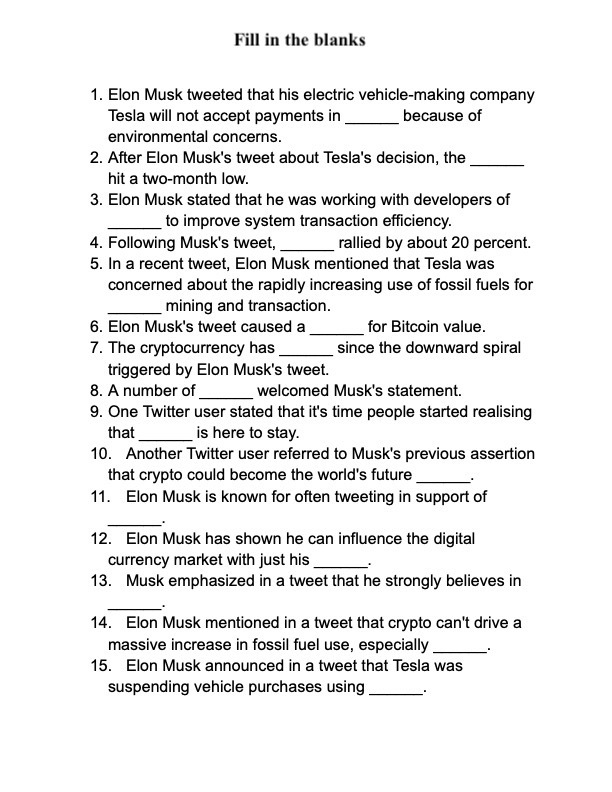

In [4]:
cv2_imshow(img1)

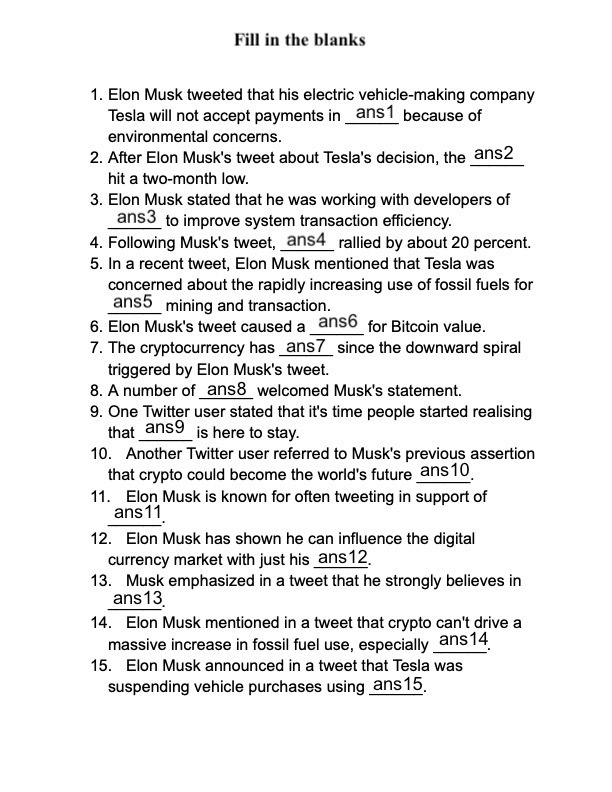

In [5]:
cv2_imshow(img2)

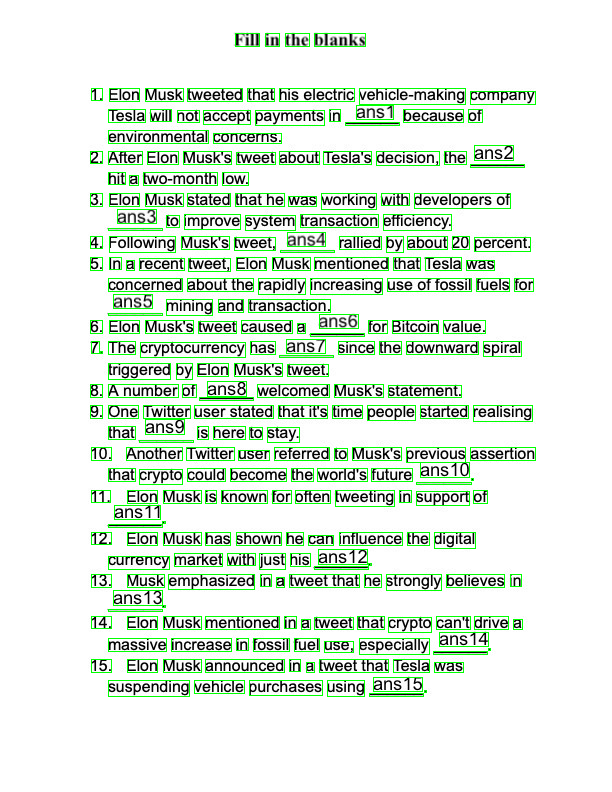

In [6]:
import cv2 as cv
img2 = cv.imread("/content/drive/MyDrive/Projects/Pragament assignment/answer.jpeg")
img4 = img2.copy()
#converting to grayscale
gray = cv.cvtColor(img4,cv.COLOR_BGR2GRAY)
#applying gaussian blur
blur = cv.GaussianBlur(gray,(3,3),0)
#thresholding to convert into binary
ret2,thresholded = cv.threshold(blur,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# cv2_imshow(thresholded)
#dilate image to connect text contours
kernel = cv.getStructuringElement(cv.MORPH_RECT,(5,1))
dilated = cv.morphologyEx(thresholded,cv.MORPH_CLOSE,kernel)
# dilated = cv.dilate(thresholded,kernel,iterations=1)
# cv2_imshow(dilated)
#get external contours
contours2 = cv.findContours(dilated,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
contours2 = contours2[0] if len(contours2)==2 else contours2[1]
#draw contours
for points in contours2:
    pad = 10
    x,y,w,h = cv.boundingRect(points)
    # text2.append(pytesseract.image_to_string(img1[y:y+h,x:x+w]).lower())
    # print(list(box.flatten()).count(255),box.shape)
    cv.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),1)
cv2_imshow(img2)

0 (14, 49) 686
0 (14, 49) 686
0 (15, 49) 735
0 (15, 49) 735
0 (14, 46) 644
0 (15, 49) 735
0 (15, 39) 585
0 (15, 39) 585
0 (14, 39) 546
0 (14, 39) 546
0 (14, 39) 546
0 (14, 38) 532
0 (14, 39) 546
0 (15, 39) 585
0 (14, 37) 518


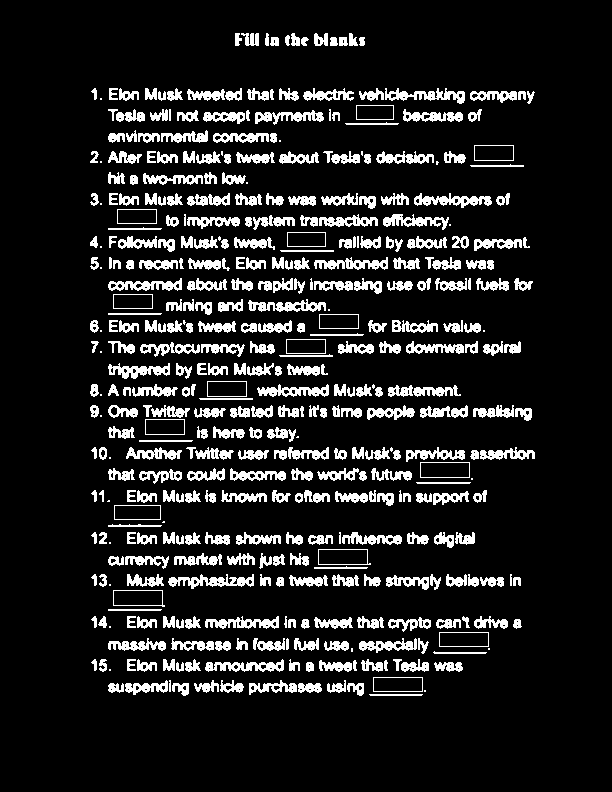

In [43]:
img1 = cv.imread("/content/drive/MyDrive/Projects/Pragament assignment/empty_sheet.jpg")
img3 = img1.copy()
#converting to grayscale
gray = cv.cvtColor(img3,cv.COLOR_BGR2GRAY)
#applying gaussian blur
blur = cv.GaussianBlur(gray,(3,3),0)
#thresholding to convert into binary
ret2,thresholded1 = cv.threshold(blur,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
answers = []
for points in contours2:
    pad = 10
    x,y,w,h = cv.boundingRect(points)
    # text2.append(pytesseract.image_to_string(img1[y:y+h,x:x+w]).lower())
    box = thresholded1[y:y+h,x:x+w]
    count = list(box.flatten()).count(0)
    area = box.shape[0]*box.shape[1]
    # print(box)
    # print(count,area)
    if((area-count)<10 and area>9):
      answers.append(points)
      print(list(box.flatten()).count(255),box.shape,box.shape[0]*box.shape[1])
      cv.rectangle(thresholded1,(x,y),(x+w,y+h),(255,255,255),1)
cv2_imshow(thresholded1)

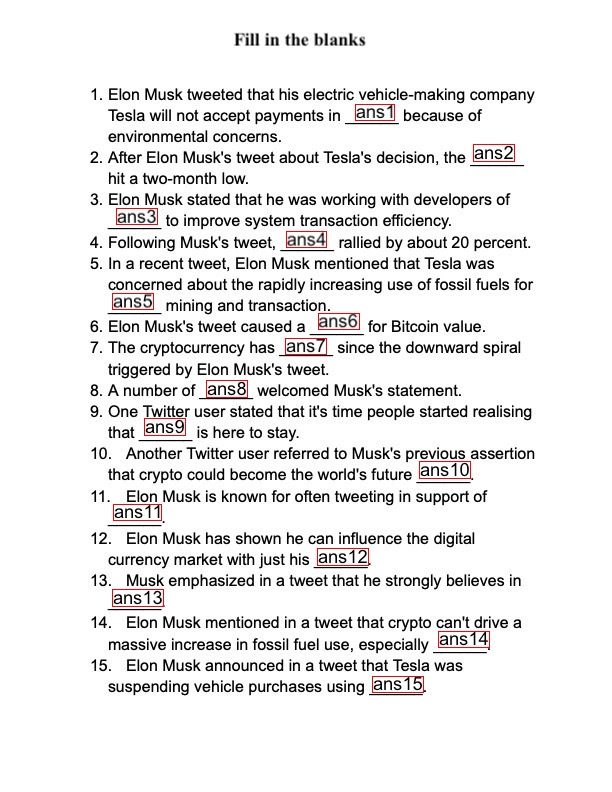

In [66]:
img2 = cv.imread("/content/drive/MyDrive/Projects/Pragament assignment/answer.jpeg")
final = []
text = []
for points in answers:
  pad=1
  x,y,w,h = cv.boundingRect(points)
  box = img2[y:y+h,x:x+w]
  final.append(box)
  t = pytesseract.image_to_string(box)
  text.append(t)
  cv.rectangle(img2,(x-pad,y-pad),(x+w+pad,y+h+pad),(0,0,255),1)
cv2_imshow(img2)

### Accuracy of OCR was low

In [68]:
text1 = [i.rstrip('\n\x0c') for i in text]
text1

['',
 '',
 '',
 '',
 '',
 '',
 'ans9',
 'ans8',
 'ans/',
 'anso',
 'ans5',
 'ans4',
 'ans3',
 'ans?',
 'ans1']

### Answers are displayed as image

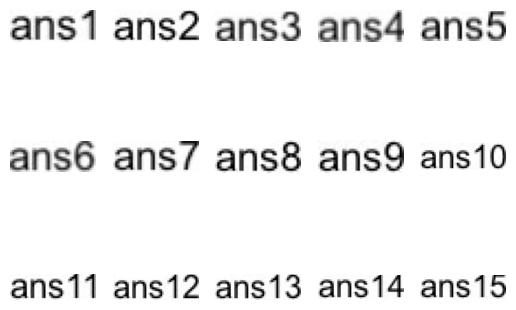

In [64]:
final = final[::-1]
for i in range(len(final)):
  plt.subplot(3,5,i+1)
  plt.imshow(final[i])
  plt.axis('off')